## **TAREA 3 Astrofísica observacional**



## **Paso 0**
Importar las librerias necesarias e instalar photutils

In [ ]:
pip install photutils

In [ ]:
# modulos a importar
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

from  astropy.stats import sigma_clipped_stats
from matplotlib.ticker import AutoMinorLocator
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture,CircularAnnulus
from photutils.aperture import ApertureStats, aperture_photometry

## **Paso 1**
Leer la imagen en la banda V y calcular medidas de tendencia central usando sigma cliping

In [ ]:
hdu= pf.open('sci_V_reducida (1).fits')    #abrimos la imagen
data= hdu[0].data                      #extraemos los datos
header= hdu[0].header                  #extraemos el header
hdu.close()

mean_V, median_V, std_V= sigma_clipped_stats(data, sigma=3.0)   #calculamos el promedio, la mediana y la desviacion estandar
print("promedio=",mean_V,"mediana=",median_V,"desviacion estandar",std_V)

promedio= 231.65005435266661 mediana= 222.3406693424513 desviacion estandar 42.45267416127786


In [ ]:
header #imprimimos el header de los datos para tener claro con que estamos trabajando

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4104                                                  
NAXIS2  =                 4104                                                  
EXTEND  =                    T                                                  
EXPTIME =                260.0                                                  
FILTERID= 'V       '                                                            
HISTORY Imagen reducida                                                         

## **Paso 2**
Encontrar las estrellas e implimir la tabla resultante usando 2 float

In [ ]:
# Ahora vamos a buscar las estrellas con DAOStar
daofind= DAOStarFinder(fwhm=8, threshold=5.0*std_V)  #le damos a DAOStarFinder los parametros para encontrar las estrellas
sources_V= daofind(data-median_V)                  #Aplicamos la funcion a nuestra imagen

print("Encontramos",len(sources_V),"estrellas")

Encontramos 20723 estrellas


In [ ]:
# Ahora imprimimos la tabla de las fuentes pero usando solo 2 float
for col in sources_V.colnames:
  if col not in ('id', 'npix'):         #le aplicam0s la correccion a todas las columnas menos a id y a npix
    sources_V[col].info.format = '%.3f'

sources_V

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,538.955,1.488,0.544,-0.353,-0.976,121,0.000,253.540,2.448,-0.972
2,874.063,1.417,0.406,-0.199,-0.259,121,0.000,219.045,2.756,-1.101
3,1482.354,1.531,0.392,-0.277,-0.776,121,0.000,343.950,3.978,-1.499
4,1597.501,0.678,0.418,-0.144,-0.429,121,0.000,79.281,1.132,-0.135
5,1860.642,1.189,0.524,-0.415,-0.997,121,0.000,888.713,9.022,-2.388
6,2186.097,1.046,0.494,-0.533,-0.753,121,0.000,201.766,2.085,-0.798
7,2298.834,0.497,0.388,-0.075,-0.266,121,0.000,500.049,7.398,-2.173
8,2560.143,2.371,0.399,0.819,-0.542,121,0.000,200.047,1.812,-0.645
9,2608.548,1.512,0.348,-0.298,-0.686,121,0.000,95.837,1.308,-0.291


## **Paso 3**
Crear las aperturas circulares y graficar un cuadrante de la imagen con las aperturan en azul encima

In [ ]:
positions= np.array([sources_V['xcentroid'],sources_V['ycentroid']]).T  #desempaquetamos las posiciones
apertures= CircularAperture(positions, r=8.0)    #creamos las aperturas circulares

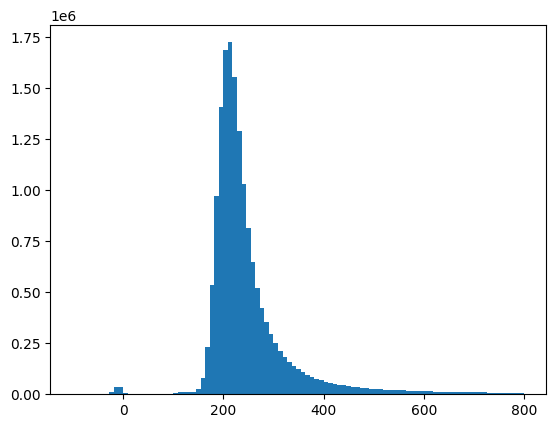

In [ ]:
plt.hist(data.flatten(),bins=np.linspace(-100,800,100)) #hacemos un histogramas para establecer un vmin y vmax
plt.show()

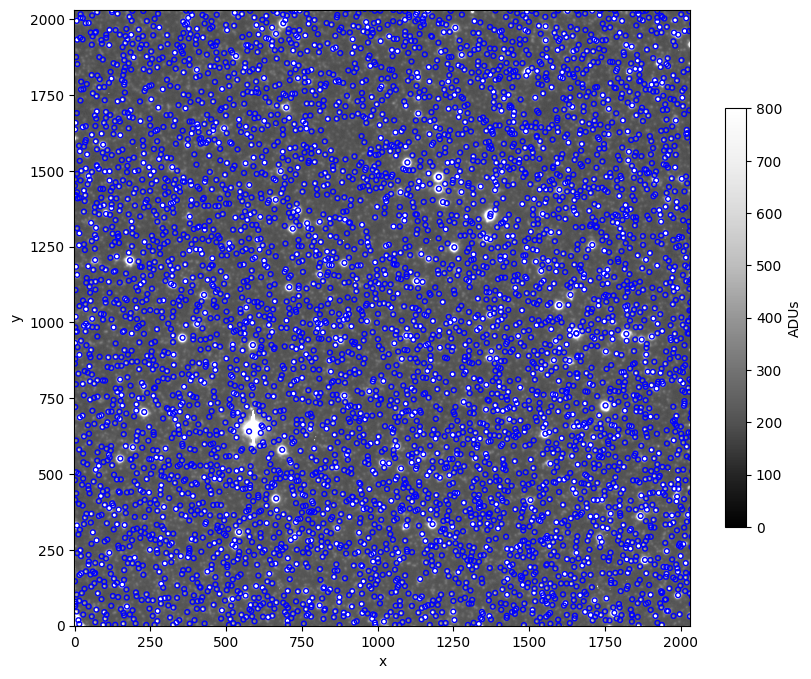

In [ ]:
fig= plt.figure(1,figsize=(9,8))   #graficamos nuestra imagen con las aperturas circulares
ax= fig.add_subplot(111)
sc= ax.imshow(data[0:2032,0:2032], cmap='Greys_r',origin='lower',vmin=0,vmax=800)
ax.set_xlabel('x')
ax.set_ylabel('y')
apertures.plot(color='blue', linewidth=1.0)
cb=plt.colorbar(sc,fraction=0.030)
cb.set_label('ADUs')


plt.show()

## **Paso 4**
Crear aperturas de anillo de cielo y graficar la imagen anterior incluendo estas en color verde lima

In [ ]:
anillos_cielo= CircularAnnulus(positions, r_in=14.0, r_out=18.0) #creamos los anillos de cielo
len(anillos_cielo)

20723

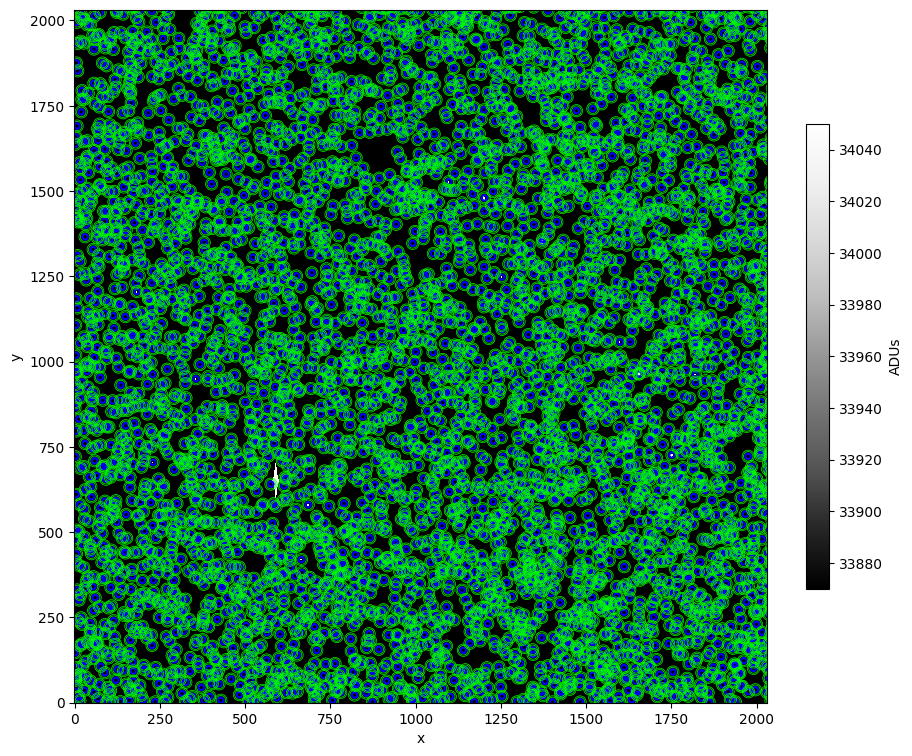

In [ ]:
fig= plt.figure(1,figsize=(10,9))     #graficamos con las aperturas y los anillos
ax1= fig.add_subplot(111)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
sc= ax1.imshow(data[0:2032,0:2032],origin='lower',cmap='Greys_r',vmin=33870,vmax=34050)
apertures.plot(color='blue', lw=1.5)
anillos_cielo.plot(color='lime', lw=0.5)
cb= plt.colorbar(sc,fraction= 0.030)
cb.set_label('ADUs')
plt.show()

## **Paso 5**
Realizar la fotometria de apertura

In [ ]:
star_data= aperture_photometry(data,apertures)
star_data

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,538.9553540598824,1.4884230190325134,39990.942281481286
2,874.0630268671209,1.416735906934085,38152.80268456586
3,1482.3544436138138,1.5314920326256294,46362.8461413005
4,1597.5011153206358,0.6781859418394868,28666.405510949266
5,1860.6421569570814,1.188980984917672,63815.42242961697
6,2186.097472247131,1.0456612915719257,39102.194894050364
7,2298.8343428778103,0.49684281434884137,41525.36358477892
8,2560.1432457060732,2.3709607927398597,53565.771864734954


In [ ]:
aperstats= ApertureStats(data,anillos_cielo)
bkg_prom= aperstats.mean
aperture_area= apertures.area_overlap(data)

total_bkg= bkg_prom*aperture_area
star_data['total_bkg']= total_bkg

star_data

id,xcenter,ycenter,aperture_sum,total_bkg
,pix,pix,,
int64,float64,float64,float64,float64
1,538.9553540598824,1.4884230190325134,39990.942281481286,36444.53565299896
2,874.0630268671209,1.416735906934085,38152.80268456586,29105.680610723735
3,1482.3544436138138,1.5314920326256294,46362.8461413005,30582.696804607178
4,1597.5011153206358,0.6781859418394868,28666.405510949266,27143.276996416575
5,1860.6421569570814,1.188980984917672,63815.42242961697,29788.3626010108
6,2186.097472247131,1.0456612915719257,39102.194894050364,34441.91739218216
7,2298.8343428778103,0.49684281434884137,41525.36358477892,28989.970875929408
8,2560.1432457060732,2.3709607927398597,53565.771864734954,40683.63628383793


## **Paso 6**
Estimar las magnitud V de cada estrella

In [ ]:
exp_time= header['EXPTIME']
zp= 21.9
star_data['mag']= zp -2.5*np.log10((star_data['aperture_sum']-star_data['total_bkg'])/exp_time)

print(star_data['mag'])

       mag        
------------------
19.062962044879956
18.046157244074966
 17.44215559774434
 19.98059199832742
 16.60787230819083
18.766403924799775
 17.69208850970905
17.662463705745353
19.850987030920653
20.102825105086183
               ...
17.766043620157365
18.245526238420894
18.955495358171007
20.306125978829947
17.831644308919028
16.300712599958093
               nan
18.179373144154322
16.369203464394165
               nan
Length = 20723 rows


<ipython-input-44-1a157e53b0ad>:3: RuntimeWarning: invalid value encountered in log10
  star_data['mag']= zp -2.5*np.log10((star_data['aperture_sum']-star_data['total_bkg'])/exp_time)


## **Paso 7**
Realizar la fotometria para la imagen en banda I

In [ ]:
hdu_I= pf.open('sci_I_reducida (1).fits')    #abrimos la imagen
data_I= hdu_I[0].data                    #extraemos los datos
header_I= hdu_I[0].header                #extraemos el header
hdu_I.close()

mean_I, median_I, std_I= sigma_clipped_stats(data_I, sigma=3.0)   #calculamos el promedio, la mediana y la desviacion estandar
print("promedio=",mean_I,"mediana=",median_I,"desviacion estandar",std_I)

promedio= 215.42438769712388 mediana= 210.9090263435022 desviacion estandar 28.676347893566987


In [ ]:
star_data_I= aperture_photometry(data_I,apertures)
star_data_I

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,538.9553540598824,1.4884230190325134,33742.608636161145
2,874.0630268671209,1.416735906934085,31165.89870950541
3,1482.3544436138138,1.5314920326256294,35210.92719217381
4,1597.5011153206358,0.6781859418394868,25225.303216713924
5,1860.6421569570814,1.188980984917672,50277.19593610258
6,2186.097472247131,1.0456612915719257,30494.885985468492
7,2298.8343428778103,0.49684281434884137,31288.606609441602
8,2560.1432457060732,2.3709607927398597,39459.80316788364


In [ ]:
aperstatsI= ApertureStats(data_I,anillos_cielo)
bkg_promI= aperstatsI.mean
aperture_areaI= apertures.area_overlap(data_I)

total_bkgI= bkg_promI*aperture_areaI
star_data_I['total_bkg']= total_bkgI

star_data_I

id,xcenter,ycenter,aperture_sum,total_bkg
,pix,pix,,
int64,float64,float64,float64,float64
1,538.9553540598824,1.4884230190325134,33742.608636161145,31495.440177322052
2,874.0630268671209,1.416735906934085,31165.89870950541,27349.01358367772
3,1482.3544436138138,1.5314920326256294,35210.92719217381,27919.088379431694
4,1597.5011153206358,0.6781859418394868,25225.303216713924,24731.283567114388
5,1860.6421569570814,1.188980984917672,50277.19593610258,27133.48528718441
6,2186.097472247131,1.0456612915719257,30494.885985468492,28688.470538770674
7,2298.8343428778103,0.49684281434884137,31288.606609441602,26672.415476654576
8,2560.1432457060732,2.3709607927398597,39459.80316788364,33879.71577967484


In [ ]:
exp_timeI= header_I['EXPTIME']
zp= 21.9
star_data_I['mag']= zp-2.5*np.log10((star_data_I['aperture_sum']-star_data_I['total_bkg'])/exp_timeI)

print(star_data_I['mag'])

       mag        
------------------
  18.7188640388755
18.143680391412072
17.440860465268116
 20.36359255686392
 16.18687063770302
18.955909019473207
17.937243659054342
 17.73135061422687
19.956985717838993
 20.08480311115065
               ...
               nan
17.768314104289402
18.109169631388433
18.863169880347176
  18.2296736057195
15.657909750762741
21.417979175793853
18.225943020756496
15.138867842205967
               nan
Length = 20723 rows


<ipython-input-26-f0b2ffab4783>:3: RuntimeWarning: invalid value encountered in log10
  star_data_I['mag']= zp-2.5*np.log10((star_data_I['aperture_sum']-star_data_I['total_bkg'])/exp_timeI)


## **Paso 8**
Realizar un diagrama color magnitud con las magnitudes en los filtros I y V

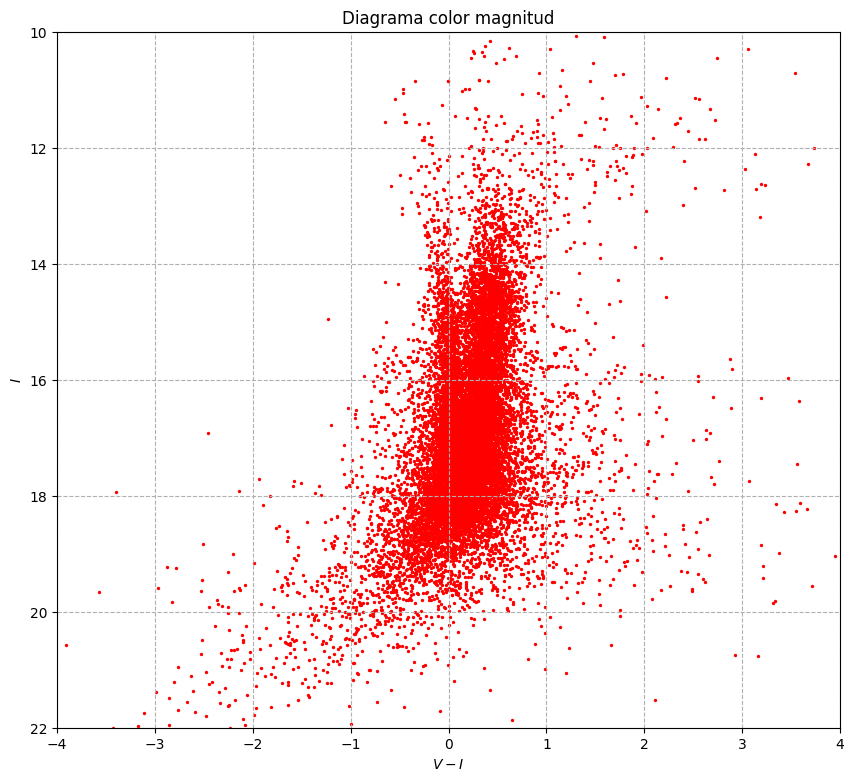

In [ ]:
fig= plt.figure(1,figsize=(9,8))
fig.subplots_adjust(left=0.1,bottom=0.1,top=0.97,right=0.97)
ax1= fig.add_subplot(111)
ax1.scatter((star_data['mag']-star_data_I['mag']),star_data_I['mag'],s=2,color='red')
ax1.set_xlabel('$V-I$')
ax1.set_ylabel('$I$')
ax1.set_title('Diagrama color magnitud')

ax1.set_xlim(-4,4)
ax1.set_ylim(22,10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.grid('on',ls='--')
plt.show()